# Google Playstore Case Study

In this module I’ll be learning data visualisation with the help of a case study. This will enable to understand how visualisation aids you in solving business problems. 

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps? 
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?




### Session 1 - Introduction to Data Visualisation

In [1]:
#import the libraries
import pandas as pd
import numpy as np


In [2]:
#reading the dataset and checking the first five rows
inp0 = pd.read_csv("googleplaystore_v2.csv")
inp0.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
#Check the shape of the dataframe
inp0.shape


(10841, 13)

### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

In [4]:
#Checking the datatypes of all the columns of the dataframe
inp0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### Missing Value Treatment

In [5]:
#Checking the number of null values in the columns
inp0.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable
 - drop the records

In [6]:
#Drop the rows having null values in the Rating field
inp1=inp0[~inp0.Rating.isnull()]


#Check the shape of the dataframe
inp1.shape


(9367, 13)

In [7]:
# Check the number of nulls in the Rating field again to cross-verify
inp1.Rating.isnull().sum()


0

In [8]:
#Question
#Check the number of nulls in the dataframe again and find the total number of null value
inp1.isnull().sum()



App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [9]:
#Inspect the nulls in the Android Version column
inp1[inp1["Android Ver"].isnull()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
#Drop the row having shifted values
inp1=inp1.drop(10472)

In [11]:
#Check the nulls againin Android version column to cross-verify
inp1[inp1["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [12]:
#Check the most common value in the Android version column
inp1["Android Ver"].value_counts()



4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [13]:
inp1["Android Ver"].mode()[0]

'4.1 and up'

In [14]:
#Fill up the nulls in the Android Version column with the above value
#Check the number of nulls in the dataframe again and find the total number of null value
inp1["Android Ver"].fillna("4.1 and up",inplace=True)



In [15]:
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [16]:
#Check the nulls in the Android version column again to cross-verify
inp1["Android Ver"].value_counts()


4.1 and up            2061
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [17]:
inp1["Android Ver"].isnull().sum()

0

In [18]:
#Check the nulls in the entire dataframe again
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [19]:
#Check the most common value in the Current version columninp
inp1[inp1["Current Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [20]:
inp1["Current Ver"].value_counts()

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: Current Ver, Length: 2638, dtype: int64

In [21]:
inp1["Current Ver"].mode()[0]

'Varies with device'

In [22]:
#Replace the nulls in the Current version column with the above value

inp1["Current Ver"].fillna("Varies with device",inplace=True)

In [23]:
# Question : Check the most common value in the Current version column again
inp1.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#### Handling Incorrect Data Types 

In [24]:
#Check the datatypes of all the columns 
inp1["Current Ver"].value_counts()


Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: Current Ver, Length: 2638, dtype: int64

In [26]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [27]:
#Analyse the Price column to check the issue
inp1.Price.value_counts()


0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: Price, Length: 73, dtype: int64

In [28]:
#Write the function to make the changes
inp1["Price"]=inp1["Price"].apply(lambda x:0 if x=="0" else float(x[1:]))


In [29]:
#Verify the dtype of Price once again
inp1["Price"].dtypes
inp1["Price"].value_counts()

0.00      8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
1.29         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: Price, Length: 73, dtype: int64

In [30]:
#Analyse the Reviews column
inp1["Reviews"].value_counts()


2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: Reviews, Length: 5992, dtype: int64

In [31]:
#Change the dtype of this column
inp1["Reviews"]=inp1["Reviews"].astype("int32")


#Check the quantitative spread of this dataframe
inp1["Reviews"].describe()


count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [32]:
#Analyse the Installs Column
inp1["Installs"].value_counts()


1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [129]:
#Question Clean the Installs Column and find the approximate number of apps at the 50th percentile.
inp1["Installs"]=inp1["Installs"].replace("+"," ").replace(","," ")

In [130]:
inp1["Installs"]

0            10 000 
1           500 000 
2         5 000 000 
3        50 000 000 
4           100 000 
            ...     
10834           500 
10836         5 000 
10837           100 
10839         1 000 
10840    10 000 000 
Name: Installs, Length: 8017, dtype: object

In [131]:
inp1["Installs"]=inp1["Installs"].replace(' ','',regex=True)

In [132]:
inp1["Installs"]

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 8017, dtype: object

In [133]:
inp1["Installs"]=inp1["Installs"].astype("int32")

In [134]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [135]:
inp1["Installs"].median()

500000.0

#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [136]:
#Perform the sanity checks on the Reviews column
inp1.Rating.describe()




count    8017.000000
mean        4.165024
std         0.526813
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [137]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [138]:
inp1[(inp1.Reviews>inp1.Installs)].shape

(4, 13)

In [139]:
inp1[(inp1.Reviews>inp1.Installs)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.0,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.0,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.0,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.0,Teen,Social,"July 23, 2018",1.0,4.0 and up


In [140]:
inp1=inp1[inp1.Reviews<=inp1.Installs]

In [141]:
#perform the sanity checks on prices of free apps 

inp1=inp1[(inp1["Type"]=="Free")&(inp1["Price"]<=0)]

In [142]:
inp1["Price"].describe()

count    8013.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Price, dtype: float64

#### Outliers Analysis Using Boxplot

Now you need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you’ll start utilising visualisation to achieve your tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable


Using a box plot you can identify the outliers as follows:

![BoxPlots to Identify Outliers](images\Boxplot.png)

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

- You can create a box plot directly from pandas dataframe or the matplotlib way as you learnt in the previous session. Check out their official documentation here:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
   - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

In [143]:
#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline

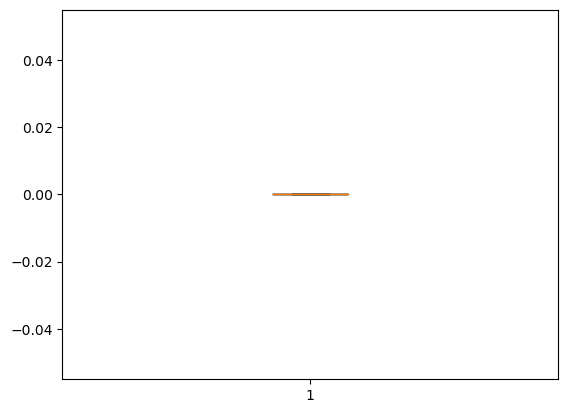

In [144]:
#Create a box plot for the price column
plt.boxplot(inp1.Price)
plt.show()

In [148]:
#Check the apps with price more than 30
inp1.describe()

,Rating,Reviews,Size,Installs,Price
count,8013.000000,8013.000000,8013.000000,8.013000e+03,8013.0
mean,4.164608,73113.164608,21695.167990,4.614316e+06,0.0
std,0.526614,161128.308870,20594.670385,2.971088e+07,0.0
min,1.000000,1.000000,8.500000,5.000000e+00,0.0
25%,4.000000,178.000000,6200.000000,1.000000e+04,0.0
50%,4.300000,4704.000000,19000.000000,5.000000e+05,0.0
75%,4.500000,53015.000000,26000.000000,5.000000e+06,0.0
max,5.000000,995002.000000,100000.000000,1.000000e+09,0.0


In [149]:
#Clean the Price column again
inp1.shape


(8013, 13)

### Histograms

Histograms can also be used in conjuction with boxplots for data cleaning and data handling purposes. You can use it to check the spread of a numeric variable. Histograms generally work by bucketing the entire range of values that a particular variable takes to specific __bins__. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its __frequency__.


![Histogram](images\Histogram.png)

You can adjust the number of bins to improve its granularity

![Bins change](images\Granular.png)

You'll be using plt.hist() to plot a histogram. Check out its official documentation:https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

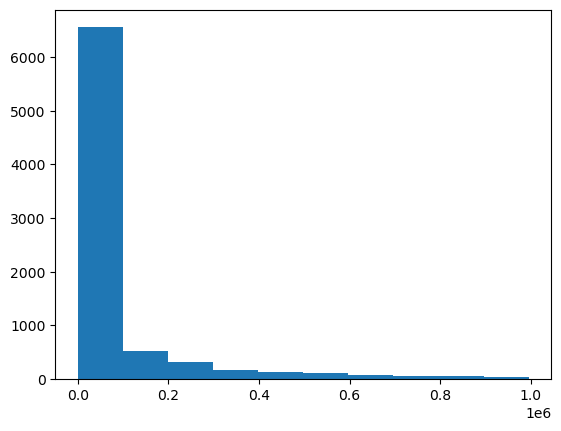

In [150]:
#Create a histogram of the Reviews
plt.hist(inp1.Reviews)
plt.show()

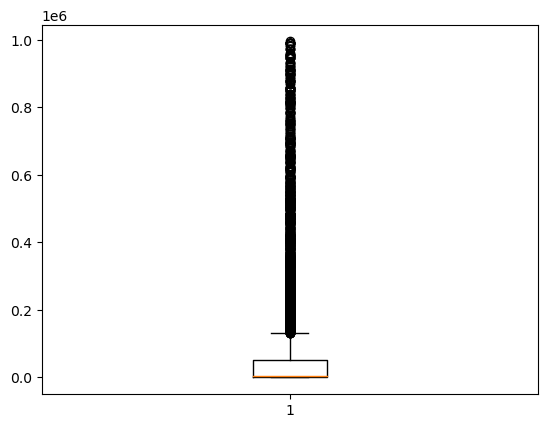

In [151]:
# boxplot of the Reviews column

plt.boxplot(inp1.Reviews)
plt.show()

In [152]:
#Check records with 1 million reviews
inp1[inp1.Reviews>=10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [153]:
#Drop the above records
inp1=inp1[inp1.Reviews<=1000000]

In [154]:
inp1.shape

(8013, 13)

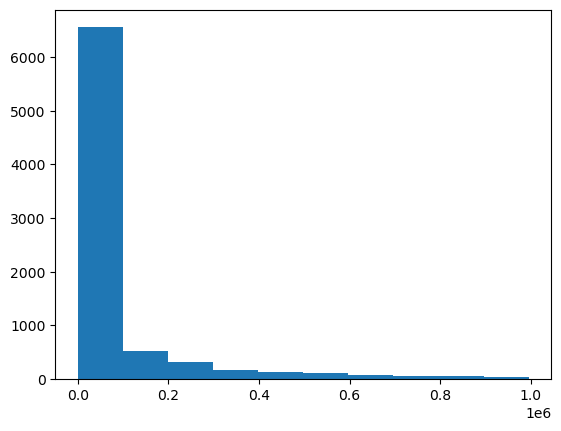

In [155]:
#Question - Create a histogram again and check the peaks

plt.hist(inp1.Reviews)
plt.show()

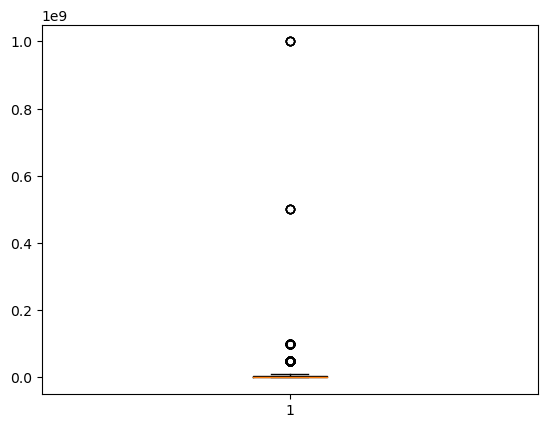

In [161]:
#Question - Create a box plot for the Installs column and report back the IQR
plt.boxplot(inp1.Installs)
plt.show()


In [162]:
inp1["Installs"].describe()

count    8.013000e+03
mean     4.614316e+06
std      2.971088e+07
min      5.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [163]:
sorted_data=inp1["Installs"].sort_values()

In [171]:
Q1=sorted_data.quantile(0.25)
Q1

10000.0

In [172]:
Q3=sorted_data.quantile(0.75)
Q3

5000000.0

In [173]:
QTR=Q3-Q1
QTR

4990000.0

In [174]:
#Question - CLean the Installs by removing all the apps having more than or equal to 100 million installs
inp1[inp1.Installs>=10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20000.000000,10000000,Free,0.0,Teen,Art & Design,"April 2, 2018",3.8,4.1 and up
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31000.000000,10000000,Free,0.0,Everyone,Art & Design,"July 30, 2018",5.5.4,4.1 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,21516.529524,10000000,Free,0.0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
45,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,4.7,174531,24000.000000,10000000,Free,0.0,Everyone,Art & Design,"July 31, 2018",1.6.1,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10729,MX Player Codec (ARMv7),LIBRARIES_AND_DEMO,4.3,332083,6300.000000,10000000,Free,0.0,Everyone,Libraries & Demo,"April 23, 2018",1.9.19,4.0 and up
10740,PhotoFunia,PHOTOGRAPHY,4.3,316378,4400.000000,10000000,Free,0.0,Everyone,Photography,"June 3, 2017",4.0.7.0,2.3 and up
10781,Modern Strike Online,GAME,4.3,834117,44000.000000,10000000,Free,0.0,Teen,Action,"July 30, 2018",1.25.4,4.1 and up
10784,Big Hunter,GAME,4.3,245455,84000.000000,10000000,Free,0.0,Everyone 10+,Action,"May 31, 2018",2.8.6,4.0 and up


In [178]:
inp1=inp1[inp1.Installs<=10000000]

In [182]:
inp1.Installs.shape

(7814,)

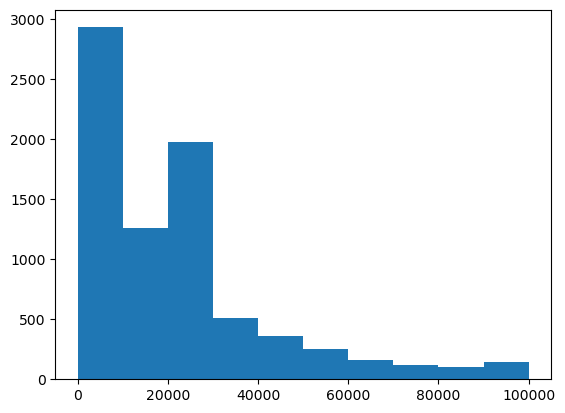

In [185]:
#Plot a histogram for Size as well.
plt.hist(inp1.Size)
plt.show()